In [1]:
import numpy as np
import matplotlib.pyplot as plt

A Variational Quantum Classifier (VQC) is a type of machine learning algorithm that uses a quantum computer to perform classification tasks. In a VQC, a quantum circuit, also known as an ansatz, is used to encode the input data into a quantum state. This encoded state is then evolved using a set of parameters, known as the variational parameters, that are optimized to minimize the difference between the output state and a target state. Once the optimization is done, the output state is measured and the measurement result is used to make predictions about the input data.

A VQC is a hybrid quantum-classical algorithm, where the quantum computer is used to perform the encoding and evolution, while the classical computer is used to perform the optimization and measurement. VQC is considered as one of the most promising areas of quantum machine learning, due to its ability to handle high-dimensional data and its potential for exponential speedup over classical algorithms.

<center>
<img src=./img/vqc.png>

## Variational Ansatz

### Heuristic Ansatz

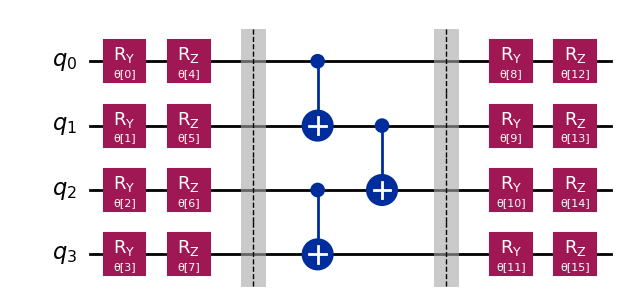

In [2]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(
    num_qubits=4, reps=1, entanglement="pairwise", insert_barriers=True
)
ansatz.decompose().draw("mpl", style="iqx")

This code creates an instance of the `EfficientSU2` class from the qiskit circuit library, which is a quantum circuit designed for efficient and shallow encoding of classical data into quantum states. The circuit is called "efficient" because it uses a small number of qubits and gates to encode a large amount of classical data, and "shallow" because the depth of the circuit is small.

The EfficientSU2 class takes several parameters:

* `num_qubits` : Number of qubits in the circuit.
* `reps` : Number of times the ansatz is repeated, which increases the amount of information that can be encoded in the circuit.
* `entanglement` : The type of entanglement used in the circuit, it can be `'pairwise'` or `'linear'`.
* `insert_barriers` : Whether or not to insert barriers between the repeated layers of the ansatz.

This code is useful for creating an efficient and shallow circuit that can be used to encode classical data into quantum states. The `EfficientSU2` class can be useful for encoding classical data in a quantum machine learning setting, such as in a quantum support vector machine or quantum kernel method.

### More problem-specific Ansatz

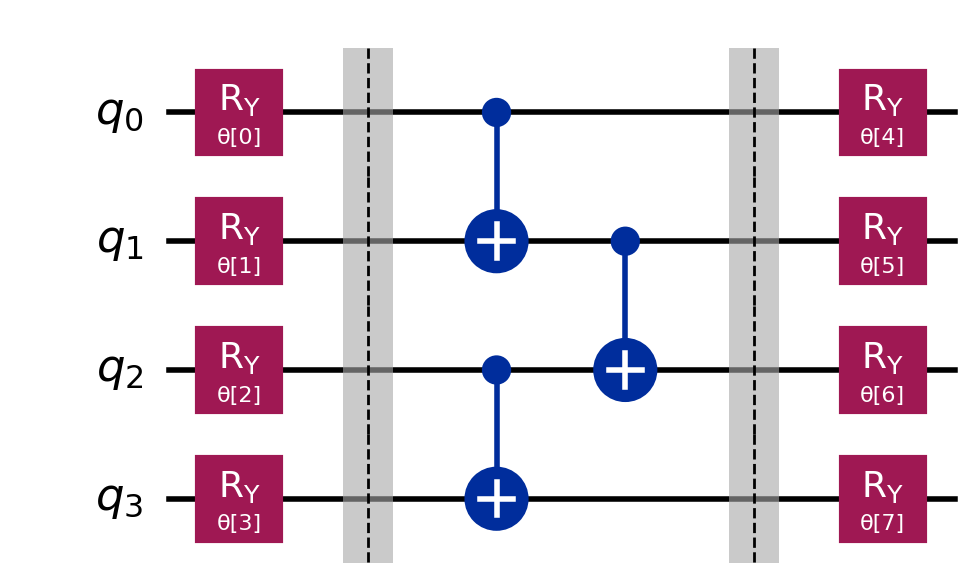

In [3]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(
    num_qubits=4, reps=1, entanglement="pairwise", insert_barriers=True
)
ansatz.decompose().draw("mpl", style="iqx", scale=2)

This code creates an instance of the `RealAmplitudes` class from the qiskit circuit library, which is a quantum circuit designed for encoding classical data into quantum states using real amplitudes. The circuit is called "real amplitudes" because it is designed to work with classical data that can be represented as real numbers.

This code is useful for creating an efficient and shallow circuit that can be used to encode classical data into quantum states using real amplitudes. The `RealAmplitudes` class can be useful for encoding classical data in a quantum machine learning setting, such as in a quantum support vector machine or quantum kernel method. The scale parameter is used to adjust the size of the circuit when drawing it.

## Classification

### 1-feature Example

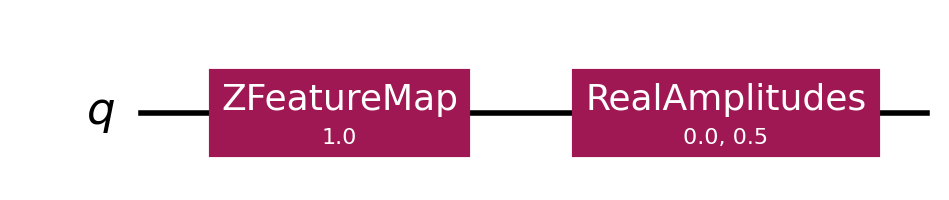

In [4]:
from qiskit.circuit.library import ZFeatureMap

num_features = 1
feature_map = ZFeatureMap(num_features)
model = RealAmplitudes(num_features, reps=1, entanglement="pairwise")

circuit = feature_map.compose(model)

data = np.array([1])
angles = np.arange(model.num_parameters) / model.num_parameters
bound = circuit.bind_parameters(np.concatenate((data, angles)))

bound.draw("mpl", style="iqx", scale=2)

The `ZFeatureMap` class from the Qiskit library is used to create a quantum circuit that maps classical input data to quantum states. `num_features` parameter is the number of features in the input data.

The `compose` function is used to combine the feature map with the Real Amplitudes Ansatz, creating a complete circuit that takes input data and applies the feature map, followed by the ansatz.

The `bind_parameters` function is used to bind the input data and angles to the circuit, so that the circuit can be executed with specific values for these parameters.

This circuit can then be executed on a quantum computer, and the output state can be measured to make predictions about the input data.

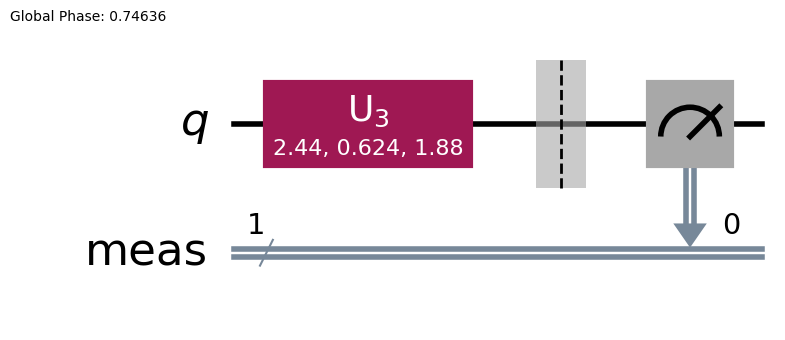

In [5]:
from qiskit import BasicAer, transpile

bound.measure_all()
backend = BasicAer.get_backend("qasm_simulator")
transpiled = transpile(bound, backend)
transpiled.draw("mpl", style="iqx", scale=2)

The `BasicAer` module from Qiskit is used to access different backends for simulating and executing quantum circuits. `get_backend("qasm_simulator")` function is used to get the QASM (Quantum Assembly Language) simulator backend which simulates the behavior of a quantum circuit on a classical computer.

The `transpile` function is used to optimize the circuit for a specific backend, in this case the `qasm_simulator`. This optimization can include gate decomposition, layout optimization, and other techniques that can improve the performance of the circuit on a particular backend.

The `measure_all` function is used to add measurements to all qubits in the circuit, this is necessary in order to obtain classical output from the quantum circuit.

After this, the circuit is ready to be executed on the backend, the results can then be used to make predictions about the input data.

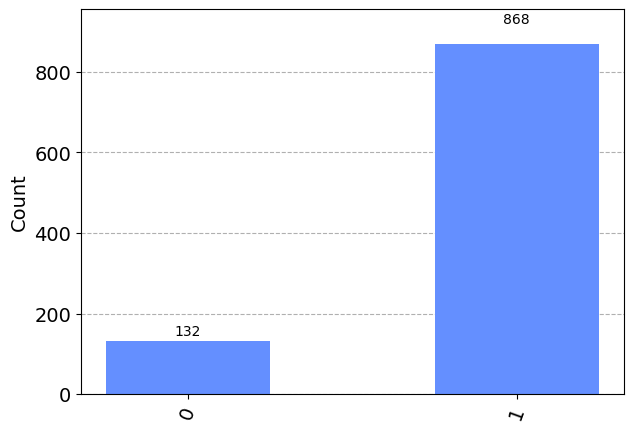

In [6]:
from qiskit.visualization import plot_histogram

result = backend.run(transpiled, shots=1000).result()
counts = result.get_counts()

plot_histogram(counts)

The `run` function is used to execute the transpiled circuit on the selected backend. The `shots` parameter specifies the number of times the circuit should be executed, in this case 1000. The result function is used to get the results of the execution, which includes the measurement outcomes.

The `get_counts` function is used to get the frequency of each measurement outcome. The output is a dictionary where the keys are the measurement outcomes in binary format and the values are the frequencies of those outcomes.

The `plot_histogram` function is used to visualize the measurement outcomes. The function takes the counts data and plots it as a histogram, where the x-axis shows the measurement outcomes in binary format and the y-axis shows the frequencies of those outcomes. This histogram can be used to make predictions about the input data based on the most frequent outcomes.

In [7]:
def parity(bitstring):
    """
    Perform a parity check on a bitstring.

    Args:
    -----

        `bitstring` (`str`): A string of binary digits (0 or 1) to check.

    Returns:
    --------

        `int`: 1 if the number of 1's in the bitstring is even, -1 if the number of 1's in the bitstring is odd.
    """
    return 1 if bitstring.count("1") % 2 == 0 else -1

This function takes in a bitstring as input and performs a parity check on it. The parity check is done by counting the number of 1's in the bitstring using the `count` method, and then checking if that count is even or odd. If the count is even, the function returns 1, otherwise it returns -1.

This `parity` function can be used to label the data based on even or odd number of 1's in the bitstring. For example, if the input data are binary strings representing the outcomes of some measurements, this function can be used to assign a label of 1 or -1 to each outcome based on whether it has an even or odd number of 1's.

#### Sampling-based result 

In [8]:
labels = {parity(bitstring): count / 1000 for bitstring, count in counts.items()}
print(labels)

{1: 0.132, -1: 0.868}


This code takes the counts obtained from running the circuit, and for each bitstring it calculates the parity using the `parity()` function, and then it creates a new dictionary, where the keys are the parities (1 or -1) and the values are the probability of getting that parity, which is obtained by dividing the count of each bitstring by the total number of shots (1000 in this case).

The `counts` variable is a dictionary where the keys are bitstrings (strings of 0s and 1s) and the values are the counts of the corresponding bitstring. The `items()` method returns a list of key-value pairs (i.e., `(bitstring, count)`) from the `counts` dictionary.

Then, it iterates over this list of key-value pairs, for each key-value pair, it calls the `parity()` function passing the key (the bitstring) as argument, to obtain the parity of the bitstring. Then it divides the value (the count) by 1000 (total number of shots) to obtain the probability of getting that bitstring.

It creates a new dictionary, where the keys are the parity and the values are the probability of getting that parity. Finally, it prints this new dictionary, which shows the probabilities of getting a bitstring with even parity or odd parity.

#### Expectation-based result

In [9]:
expectation_value = sum(k * v for k, v in labels.items())
probability_for_1 = (1 - expectation_value) / 2
expectation_labels = {1: probability_for_1, -1: 1 - probability_for_1}
print(expectation_labels)

{1: 0.868, -1: 0.132}


The code calculates the expectation value of the Pauli-Z observable as the sum of the products of the eigenvalues and probabilities for each outcome.

Then, it calculates the probability of measuring the state $|1\rangle$ by using the following formula:

$$ probability\_for\_1 = \frac{1 - expectation\_value}{2} $$

This formula is based on the fact that the expectation value of the Pauli-Z observable for a qubit in the state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ is given by $$E(Z) = \alpha^2 - \beta^2$$ and the probability of measuring the state $|1\rangle$ is given by $p(1) = \beta^2$ while for state $|0\rangle$ is given by $p(0) = \alpha^2$.

Then, it creates a new dictionary, `expectation_labels`, where the keys are the eigenvalues of the Pauli-Z observable and the values are the probabilities of measuring each eigenvalue, calculated from the expectation value.

The `expectation_labels` dictionary contains the probability of measuring the state $|0\rangle$ and $|1\rangle$, which is calculated from the expectation value of the observable, this dictionary is useful for further computation and to make predictions about the input data.

Note that, this calculation is valid only for the Pauli-Z observable, for other observables the calculation of the expectation value and the probability of measuring the states will be different.

### 2-features example

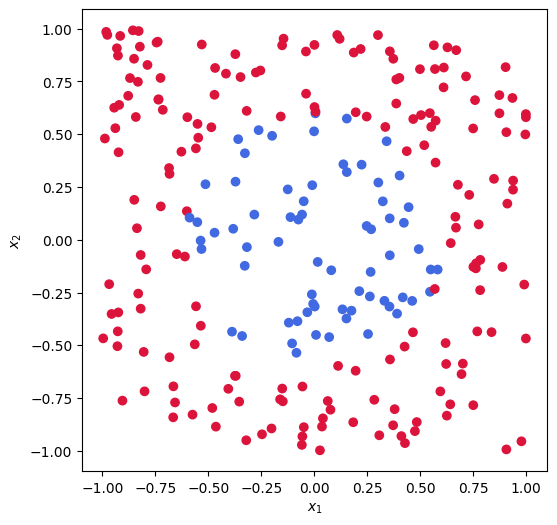

In [10]:
from data_generators import circle

points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

This code generates a dataset of points in 2D space, where each point belongs to one of two classes, represented by different colors. The points are generated using a `circle` function which is defined earlier, it takes as input an integer `num_points` and returns a tuple of two lists, one containing the points (2D coordinates) and the other containing the labels (-1 or 1). The points are sampled uniformly from a square centered at the origin, and each point is labeled as -1 if it is inside a circle of radius 0.6 centered at the origin and 1 otherwise.

#### using qiskit only

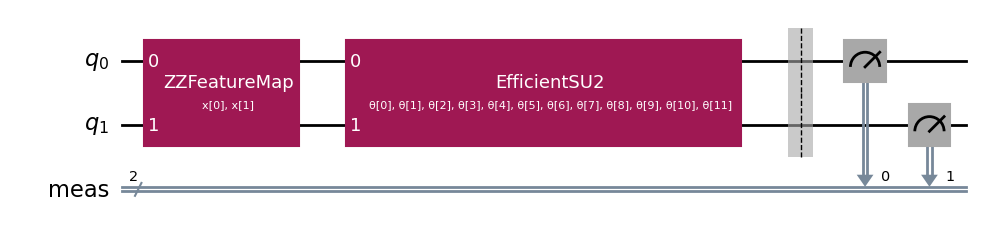

In [11]:
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2

num_features = 2

feature_map = ZZFeatureMap(num_features, reps=3)
model = EfficientSU2(num_features, reps=2, entanglement="pairwise")

circuit = feature_map.compose(model)
circuit.measure_all()
circuit.draw("mpl", style="iqx")

This code creates a quantum circuit that is a combination of two components: a feature map and a model circuit.

The `ZZFeatureMap` is a quantum feature map that maps a classical n-dimensional real-valued input to a quantum state. The input is mapped to the expectation value of ZZ observables on n qubits. The feature map is generated with `num_features = 2` qubits, and `reps = 3`, which means that the feature map will be applied 3 times on these two qubits.

The `EfficientSU2` is a ansatz circuit that can be used for quantum state preparation. It is a parametrized circuit that can be used to generate a large class of quantum states. It is generated with `num_features = 2` qubits, `reps = 2`, and `entanglement = 'pairwise'`, which means that the circuit will generate pairwise entanglement between the qubits.

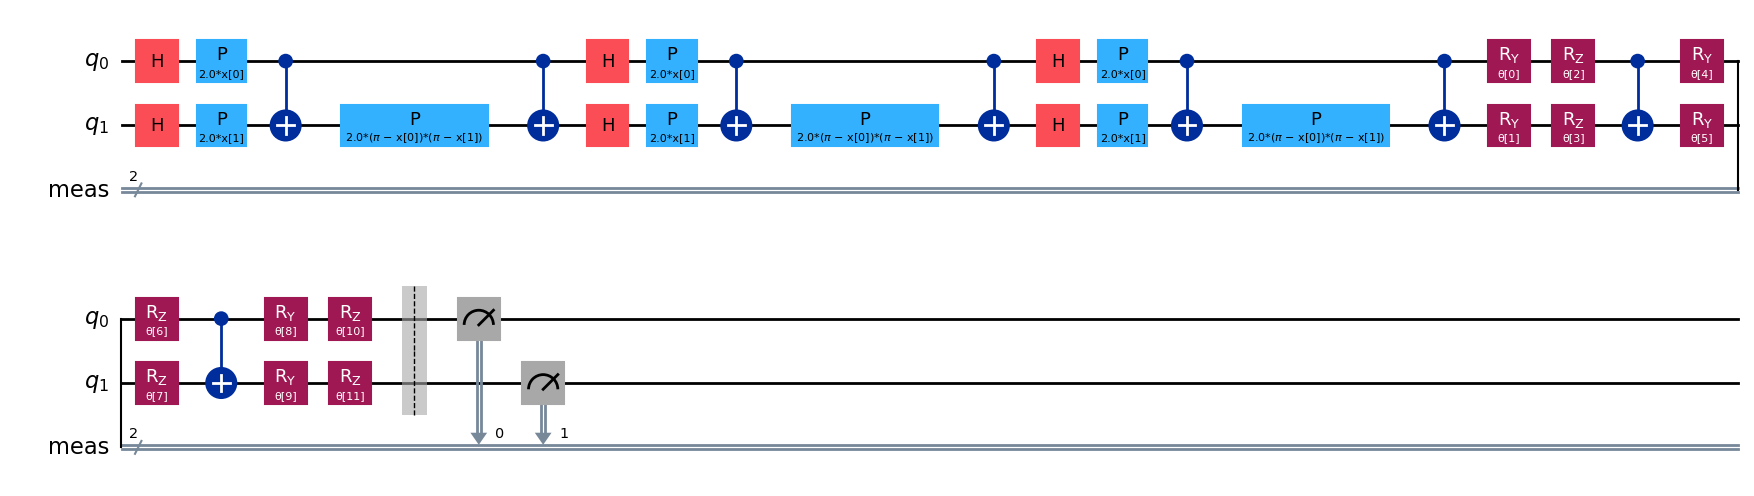

In [12]:
circuit.decompose().draw("mpl", style="iqx")

The `decompose()` method on a quantum circuit is used to decompose the circuit into a set of simpler gates. The decomposition is performed by replacing any composite gates in the circuit, such as a CNOT or a CZ gate, with a sequence of single-qubit and two-qubit gates. The decomposition process can be useful to understand the underlying gates that make up the composite gates and to optimize the circuit for a specific quantum device.

The output of the decomposed circuit will be a circuit with simpler gates, which can make it easier to understand the underlying logic of the circuit and might help in the optimization of the circuit for a specific quantum device. However, it will also increase the number of gates and the depth of the circuit, which can make it harder to simulate and execute on a real quantum computer.

In [13]:
backend = BasicAer.get_backend("qasm_simulator")
transpiled = transpile(circuit, backend)
shots = 1000

It first initializes the backend as a `"qasm_simulator"` using the `BasicAer` module. The `"qasm_simulator"` is a backend in Qiskit that simulates the execution of quantum circuits on a classical computer. It allows you to simulate the behavior of a real quantum computer and obtain the measurement outcomes of the circuit without the need for a real quantum device.

It then transpiles the circuit using the `transpile()` function and the backend. Transpiling a circuit means applying optimization techniques to the circuit to reduce the number of gates, the depth of the circuit, or the number of qubits required to implement the circuit. This step is important because it can make the simulation faster and more efficient.

Finally, it sets the number of shots to 1000. The number of shots is the number of times the circuit will be executed in the simulation. Each execution of the circuit will result in a different measurement outcome. The more shots you take, the more accurate the simulation will be.

Now the circuit is ready to be run on the backend using the `.run()` function, and the results can be obtained using the `.result()` function

In [14]:
def predict(theta, point, return_probabilities=False):
    """
    Predict the label of a point given a set of parameters theta.

    Args:
    -----

        `theta` (`array`): An array of parameters that are used to set the angles of the ansatz circuit.
        `point` (`array`): An array representing a point in the input space.
        `return_probabilities` (`bool`, `optional`): A boolean flag indicating whether to return the predicted label or
        the probability of getting a positive label. Defaults to `False`.

    Returns:
    --------

        `int`/`float` : The predicted label (0 or 1) if `return_probabilities` is `False`, otherwise it returns
        the probability of getting a positive label.
    """
    bound = transpiled.assign_parameters(np.concatenate((point, theta)))

    counts = backend.run(bound, shots=shots).result().get_counts()

    pr_1 = 0
    for bitstr, count in counts.items():
        if parity(bitstr) == 1:
            pr_1 += count / shots

    if return_probabilities:
        return pr_1

    return 1 if pr_1 >= 0.5 else 0

The code you provided is a function called `predict()` that takes three inputs: a set of parameters `theta`, a point `point`, and a boolean flag `return_probabilities`. The function uses these inputs to predict the label of the point, either 0 or 1, based on the results of running a quantum circuit on a quantum simulator.

The function first binds the parameters `theta` and `point` to the transpiled circuit using the `assign_parameters()` method. Then it runs the circuit on the backend with the specified number of shots and obtains the measurement counts using the `get_counts()` method.

The function then iterates over the measurement counts and sums up the number of times the measurement outcome has an even number of 1's. This is determined by using the `parity()` function, which checks the parity of the bitstring.

Next, the function checks the value of `return_probabilities` flag, if it is True, it returns the probability of getting a positive label, which is the probability of measuring an even number of 1's, otherwise, it returns the predicted label, which is 1 if the probability of getting a positive label is greater than or equal to 0.5 and 0 otherwise.

This function can be used to predict the labels of multiple points in the input space by passing the points and theta as input.

In [15]:
cutoff = 1e-1

def save_log(value):
    """
    Compute the natural logarithm of a value, with a cutoff.

    Args:
    -----

        `value` (`float`): The input value to take the logarithm of.

    Returns:
    --------

        `float` : The natural logarithm of the input value with a cutoff applied.
    """
    return np.log(max(cutoff, value))

The code is a function called `save_log()` that takes one input: a value. The function computes the natural logarithm of the input value and applies a cutoff value to it.

The function first checks if the input value is greater than the cutoff value, if it is, it returns the natural logarithm of the input value. If the input value is less than or equal to the cutoff value, it returns the natural logarithm of the cutoff value.

The cutoff value is a small positive value, such as `1e-1`, that is used to prevent the logarithm from being taken of zero or negative values, which would result in a math error.

This function can be useful in cases where the input value might be close to zero, and you want to avoid taking the logarithm of zero or negative values which would result in a math error. By applying the cutoff value, it ensures that the logarithm is taken only of positive values, and the function returns a meaningful output.

$$
l(\theta) = - \sum_i \left ( y_i \log f(x_i, \theta) + (1 - y_i) \log ( 1 - f(x_i, \theta) \right)
$$

The formula is the log-likelihood function for a binary classification problem, where $f(x_i, \theta)$ is the probability that an input $x_i$ belongs to the positive class, and $\theta$ are the model parameters. $y_i$ is the true label of the input $x_i$, which is either 0 or 1, and it is used to calculate the likelihood of the input.

The likelihood of an input $x_i$ is the probability of observing the true label $y_i$, given the model parameters $\theta$. The log-likelihood function is the logarithm of the likelihood function, which is used to make the optimization problem easier to solve.

The log-likelihood function is a scalar value, and it is used to evaluate the quality of a model by comparing the predicted labels of the inputs to their true labels. The goal of training a model is to find the values of the parameters $\theta$ that maximize the log-likelihood function.

In this formula, the first term of the sum is the logarithm of the probability of observing the true label of the input when it belongs to the positive class. The second term is the logarithm of the probability of observing the true label when it belongs to the negative class. The log-likelihood function is a scalar value, and it is used to evaluate the quality of a model by comparing the predicted labels of the inputs to their true labels.

In [16]:
def loss(theta, X, y):
    """
    Computes the log loss for a given set of parameters theta and a dataset.

    Parameters:
    -----------

        `theta` (`numpy.ndarray`): Array of parameters to optimize.
        `X` (`numpy.ndarray`): Data matrix with shape `(n_samples, n_features)`.
        `y` (`numpy.ndarray`): Target array with shape `(n_samples,)`.

    Returns:
    --------

        `float`: The log loss value.
    """
    loss_value = 0
    for X_i, y_i in zip(X, y):
        pr_1 = predict(theta, X_i, return_probabilities=True)
        loss_value -= y_i * save_log(pr_1) + (1 - y_i) * save_log(1 - pr_1)

    return loss_value

This function defines a loss function for a binary classification problem. The loss function is a negative log-likelihood loss, which is commonly used in supervised machine learning tasks. The loss is calculated over a dataset `X` and its corresponding labels `y`. The function accepts an additional parameter `theta`, which represents the parameters of the model.

For each example in the dataset, the function calls the `predict` function, passing the current example and `theta` as arguments. The `predict` function returns the probability that the example belongs to the positive class. The `loss_value` is updated by adding the negative log-likelihood of the example given the predicted probability. The final value returned by the function is the sum of these negative log-likelihoods.

The function also has a small number `cutoff`, which is used to prevent `log(0)` errors. If the predicted probability is less than this cutoff, it will be replaced with the `cutoff` value.

In [17]:
from qiskit.algorithms.optimizers import COBYLA

one_zero_labels = (1 + np.array(labels)) / 2

cost = lambda theta: loss(theta, points.tolist(), one_zero_labels.tolist())
result = COBYLA().minimize(cost, x0=np.random.random(model.num_parameters))

The above code is using the `COBYLA` optimizer to find the optimal parameters (`theta`) for the quantum circuit, which is composed of a feature map and a model, that minimizes the `loss` function. The loss function is defined in terms of the probability of the correct classification, given the input data points and the labels. The input points and labels are first transformed by the `one_zero_labels = (1 + np.array(labels)) / 2` transformation, where it converts the labels from `[-1, 1]` to `[0, 1]`.
The `COBYLA` optimizer is then used to find the optimal parameters (`theta`) by minimizing the `loss` function. The final result of the optimization is stored in the `result` variable

In [18]:
predictions = [predict(result.x, X_i) for X_i in points.tolist()]

The code is using the optimal parameters found by the COBYLA optimizer, to predict the labels of the dataset.

It creates a list called `predictions` and iterates over the rows of the dataset represented by the `points` variable. In each iteration, it calls the `predict()` function with the optimal parameters `result.x` and the current row of the dataset `X_i`. The `predict()` function will return the predicted label (0 or 1) for each input.

It then append the predicted label to the `predictions` list.

At the end of the iteration, the predictions list contains the predicted labels for all the data points in the dataset. This can be used to evaluate the performance of the model by comparing the predicted labels with the true labels.

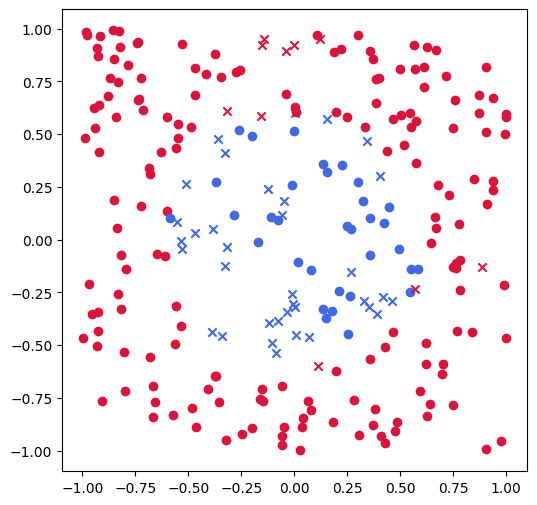

In [19]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(one_zero_labels, predictions)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points.tolist(), markers, colors):
    plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

This code is creating a scatter plot of the points that were generated by the `circle()` function, with each point being colored red or blue depending on its label. The markers for each point are also being set, with a circle marker `"o"` if the point's label is the same as the label predicted by the trained quantum machine learning model, and an `"x"` marker if the label is different. The resulting plot shows the separator line between the two classes predicted by the model on the data.

#### using Qiskit Quantum Machine Learning

In [20]:
from qiskit_machine_learning.algorithms import VQC

vqc = VQC(2, feature_map, model, quantum_instance=backend)

/tmp/ipykernel_112657/3176263615.py:3: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(2, feature_map, model, quantum_instance=backend)


The above code defines a variational quantum classifier (VQC) algorithm by specifying the number of qubits, feature map, model, and quantum backend to use for sampling. The VQC algorithm is used for binary classification tasks, where it uses a given feature map to map the input data to a high-dimensional feature space, and then uses a given model to learn a decision boundary in that space. The VQC algorithm can be trained on classical data, and then used to make predictions on new data by running the trained model on a quantum computer and using the results to make predictions.

In [21]:
one_hot = np.array([[1, 0] if label == 1 else [0, 1] for label in labels])
vqc.fit(points, one_hot)

The code is training the VQC algorithm on the dataset using the `fit()` method.

It starts by creating a one-hot encoded version of the labels, where each row corresponds to a data point and each column corresponds to a class. The entry in the row `i` and column `j` is 1 if the ith data point belongs to class `j` and 0 otherwise.

Then it calls the `fit()` method on the vqc object passing it the dataset represented by the points variable and the one-hot encoded labels `one_hot`.

The `fit()` method optimizes the parameters of the variational circuit using the data and labels provided. The optimization is done using the same algorithm used to optimize the parameters in the previous example.

In [22]:
vqc_predictions = vqc.predict(points)

The code is using the `predict()` method of the VQC algorithm to make predictions on the dataset.

It calls the `predict()` method on the vqc object and passes it the dataset represented by the points variable. The method returns an array of predictions where the entry `i` is the predicted class for the ith data point in the dataset.

The `predict()` method takes the input data and maps it to the quantum state using the feature map, then runs the ansatz circuit on the quantum state to obtain the predictions. The predictions are then obtained by measuring the output state of the circuit.

The resulting `vqc_predictions` variable contains the predictions for each data point in the dataset, which can be used to evaluate the performance of the model by comparing the predictions with the true labels.

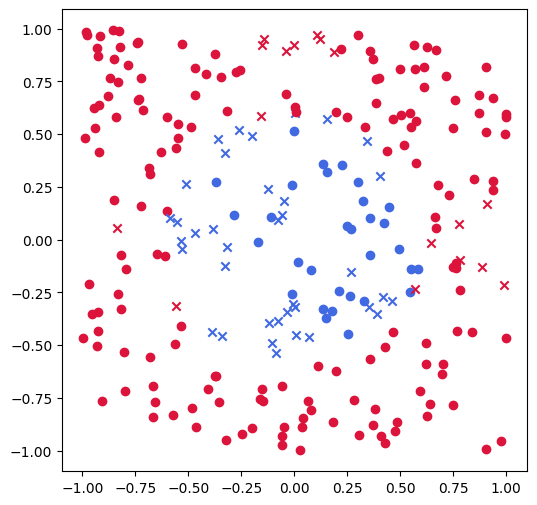

In [23]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(labels, 2 * vqc_predictions[:, 0] - 1)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points.tolist(), markers, colors):
    plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

The code is visualizing the results of the classification by plotting the points of the dataset along with their predicted labels.

This visualization can be helpful to understand the performance of the model, by providing a visual representation of the data and the predictions. It can be useful to identify areas of the input space where the model has difficulty making predictions, and to evaluate the overall performance of the model.

It is worth noting that the VQC algorithm uses the one-hot encoded representation of the labels, while in the previous example, it used the labels as they are. Therefore, the code is converting the one-hot encoded labels back.